In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split



# Inizializzazione del dataset :
- import del dataset
- drop della feature "Sale_Price" da predirre
- split in train e test
- inizializzazione indice

In [2]:

def load_and_split():
    
    #displayed column range increased
    pd.set_option("display.max_columns", 100) 
    X=house_df.iloc[:,:1]
    y=house_df.iloc[:,1:]
    
    # drop label to predict
    house_df.drop('Sale_Price', axis=1) 
    
    #split dataset test and train
    X_train, X_test,y_train, y_test = train_test_split(X,y, 
                                    test_size=0.25, 
                                    random_state=0)

# set id column as new dataset index
def set_new_index():
    house_df.set_index('id', inplace=True)
 
#read dataset
house_df = pd.read_csv('dataset/dataHouse.csv')    
load_and_split()
set_new_index()


# Omogeneizzazione del tipo delle colonne:
- da int64 a float64

In [3]:
def uniform_features_type():
    #loop through dataset colums
    for column in house_df.columns: 
        #check column type
        if house_df.dtypes[column] == np.int64 : 
            #convert type from int64 to float64 
            house_df[column]=house_df[column].astype(np.float64)    
   
uniform_features_type()

In [ ]:
def transform_bathroom():
    #get all bath features
    bath=[x for x in house_df.columns if 'Bath' in x] 
    #sum all feature values and save it inside total bath feature
    house_df['Total_Bath'] = house_df[bath].sum(axis=1) 
    #drop old bath features
    house_df.drop(['Full_Bath', 'Half_Bath', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath'], axis=1, inplace=True) 
    
transform_bathroom()

In [4]:

ALL_COLUMNS = set(house_df.columns.array) #create set with all column name
NUMERICAL_COLUMNS = set(house_df._get_numeric_data().columns) #NUMERICAL COLUMNS SET
CATEGORICAL_COLUMNS = (ALL_COLUMNS - NUMERICAL_COLUMNS ) # CATEGORICAL COLUMNS SET
print(f"CATEGORICAL: {CATEGORICAL_COLUMNS}")
print(f"NUMERICAL: {NUMERICAL_COLUMNS}")


CATEGORICAL: {'Foundation', 'Mas_Vnr_Type', 'Lot_Config', 'MS_SubClass', 'Garage_Type', 'Pool_QC', 'Condition_2', 'Condition_1', 'Fence', 'Year_Remod_Add', 'Alley', 'Garage_Qual', 'Heating_QC', 'Kitchen_Qual', 'Bsmt_Exposure', 'MS_Zoning', 'Street', 'Land_Slope', 'Heating', 'Sale_Type', 'Bldg_Type', 'Lot_Shape', 'Electrical', 'Garage_Cond', 'Exterior_1st', 'Sale_Condition', 'Bsmt_Cond', 'Paved_Drive', 'Land_Contour', 'Exterior_2nd', 'BsmtFin_Type_1', 'Garage_Finish', 'House_Style', 'Year_Built', 'Central_Air', 'Overall_Cond', 'Overall_Qual', 'Utilities', 'BsmtFin_Type_2', 'Roof_Matl', 'Misc_Feature', 'Neighborhood', 'Exter_Qual', 'Functional', 'Bsmt_Qual', 'Fireplace_Qu', 'Exter_Cond', 'Roof_Style', 'Year_Sold'}
NUMERICAL: {'BsmtFin_SF_2', 'Mo_Sold', 'Garage_Area', 'Total_Bsmt_SF', 'Garage_Cars', 'Three_season_porch', 'Wood_Deck_SF', 'BsmtFin_SF_1', 'Lot_Area', 'Bedroom_AbvGr', 'Bsmt_Unf_SF', 'Longitude', 'TotRms_AbvGrd', 'Low_Qual_Fin_SF', 'Lot_Frontage', 'Total_Bath', 'Misc_Val', 'La

In [5]:
def print_unique_column_values(column_name):
    #print(f"{set(house_df[column_name])}")
    print(f"{column_name}: N° {len(set(house_df[column_name]))} - {(set(house_df[column_name]))} ")

for column in sorted(CATEGORICAL_COLUMNS): #print in alphabetic order categorical features and their possible values
    print_unique_column_values(column)

Alley: N° 3 - {'Paved', 'Gravel', 'No_Alley_Access'} 
Bldg_Type: N° 5 - {'TwnhsE', 'Twnhs', 'Duplex', 'OneFam', 'TwoFmCon'} 
BsmtFin_Type_1: N° 7 - {'Unf', 'Rec', 'ALQ', 'LwQ', 'No_Basement', 'GLQ', 'BLQ'} 
BsmtFin_Type_2: N° 7 - {'Unf', 'Rec', 'ALQ', 'LwQ', 'No_Basement', 'GLQ', 'BLQ'} 
Bsmt_Cond: N° 6 - {'Typical', 'Fair', 'Good', 'Excellent', 'No_Basement', 'Poor'} 
Bsmt_Exposure: N° 5 - {'Mn', 'Gd', 'Av', 'No_Basement', 'No'} 
Bsmt_Qual: N° 6 - {'Typical', 'Fair', 'Good', 'Excellent', 'No_Basement', 'Poor'} 
Central_Air: N° 2 - {'Y', 'N'} 
Condition_1: N° 9 - {'Feedr', 'PosN', 'RRNn', 'RRNe', 'RRAn', 'Artery', 'RRAe', 'PosA', 'Norm'} 
Condition_2: N° 8 - {'Feedr', 'PosN', 'RRNn', 'RRAn', 'Artery', 'RRAe', 'PosA', 'Norm'} 
Electrical: N° 6 - {'FuseP', 'Unknown', 'FuseF', 'FuseA', 'SBrkr', 'Mix'} 
Exter_Cond: N° 5 - {'Typical', 'Fair', 'Good', 'Excellent', 'Poor'} 
Exter_Qual: N° 4 - {'Good', 'Excellent', 'Typical', 'Fair'} 
Exterior_1st: N° 16 - {'BrkFace', 'Wd Sdng', 'PreCast', 'As

STUDIO DELLE FEATURES TRAMITE MATRICE DI CORRELAZIONE

<AxesSubplot:>

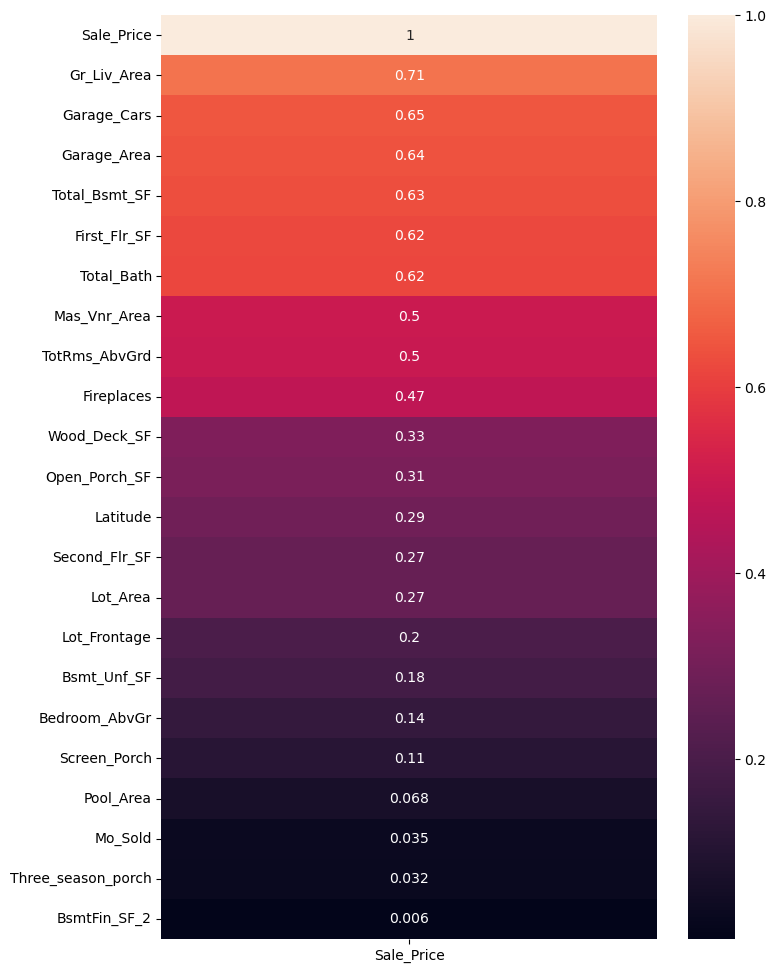

In [29]:
# Selecting the best variables and setting them as predictors for the model

correlations = house_df.corr()['Sale_Price'][house_df.corr()['Sale_Price'] >= 0]
corr_list = [x for x in correlations.index if x != 'Sale_Price']

plt.figure(figsize=(8, 12))
sns.heatmap(correlations.to_frame().sort_values('Sale_Price', ascending=False), annot=True)
#


In [ ]:
sns.boxplot(x="Pool_QC", y="Sale_Price", data=house_df)

house_df["Has_Pool"]=np.where(house_df["Pool_QC"].str.contains('No_Pool'), 0 , 1)

print(len(house_df[house_df['Pool_QC']=='Excellent'])) #4 house have excellent pool

house_df.drop("Pool_QC", axis=1, inplace=True) #drop "Pool_Quality" feature, keep only "Has_Pool" feature


<AxesSubplot:xlabel='Pool_Area', ylabel='Sale_Price'>

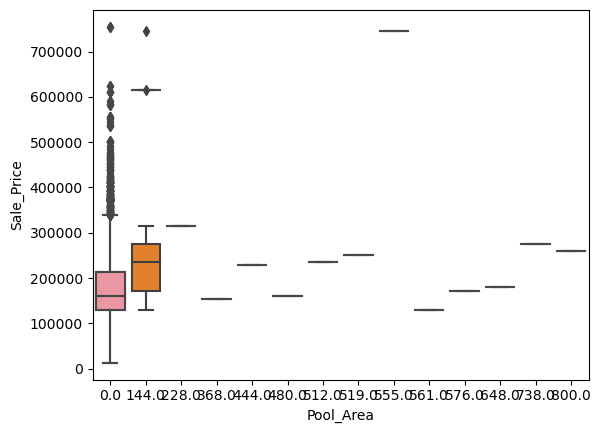

In [15]:
house_df.describe()

sns.boxplot(x="Has_Pool", y="Sale_Price", data=house_df)